# Natural Language Processing

In this document, we perform Natural Language Processing after obtaining the data.

## 1 Obtaining the Data

### 1.1 Loading the data

First, we load the data from our [dataset](https://docs.google.com/spreadsheets/d/1jzNEJWQMvfK6aJeG28JSXecrLZfjeFOCYp-gtW0Q7LQ/edit#gid=1456408654) which we have made available online. 

We display the last three records as shown in the output to ensure that we have obtained all data properly.

In [8]:
# Load datasets
import pandas as pd
import gspread
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display
from scipy.stats import zscore

sa = gspread.service_account(filename="group-28-dataset-7233caedfe09.json")
sheet = sa.open("Dataset - Group 28")
work_sheet = sheet.worksheet("Fixed Data")

df = pd.DataFrame(work_sheet.get_all_values())

new_header = df.iloc[0] 
df = df[1:152] 
df.columns = new_header 
df = df.replace(r'^\s*$', np.nan, regex=True)

df.tail(3)


,ID,Timestamp,Tweet URL,Group,Collector,Category,Topic,Keywords,Account handle,Account name,...,Quote Tweets,Views,Rating,Reasoning,Remarks,Thread/Tweet Language,Add columns here,Add columns here,Reviewer,Review
149,28-149,18/04/2023 23:47:41,https://twitter.com/fenum9/status/137914056758...,28,"Pardiñas, Miguel",HLTH,"COVID-19 vaccines contain microchip, magnetic ...","""covid"" ""vaccine"" ""metal""",@fenum9,h♤yd$n 🧙‍♂️ 𓅃,...,0,NaN,NaN,Tells that nurse on duty during vaccine appoin...,No location,Foreign,NaN,NaN,NaN,NaN
150,28-150,18/04/2023 23:54:57,https://twitter.com/Wengsterrr_/status/1371652...,28,"Pardiñas, Miguel",HLTH,"COVID-19 vaccines contain microchip, magnetic ...","""bakuna"" ""tubig""",@Wengsterrr_,𝕃𝕦𝕒𝕟𝕟 𝕃𝕚 👅,...,0,NaN,NaN,"Complains why cases went up, and points that p...",Location might be fake,Filipino,NaN,NaN,NaN,NaN
151,28-151,18/04/2023 23:59:24,https://twitter.com/AdrianSBanal/status/141888...,28,"Pardiñas, Miguel",HLTH,"COVID-19 vaccines contain microchip, magnetic ...","""bakuna"" ""tubig""",@AdrianSBanal,Nabs,...,0,NaN,NaN,"Complains that vaccine might not be working, a...",NaN,Filipino,NaN,NaN,NaN,NaN


Shown here are all the current features of the dataset. 

This may include features with missing values.

In [9]:
print("List all current features:")
df.columns

List all current features:


Index(['ID', 'Timestamp', 'Tweet URL', 'Group', 'Collector', 'Category',
       'Topic', 'Keywords', 'Account handle', 'Account name', 'Account bio',
       'Account type', 'Joined', 'Following', 'Followers', 'Location', 'Tweet',
       'Tweet Translated', 'Tweet Type', 'Date posted', 'Screenshot',
       'Content type', 'Likes', 'Replies', 'Retweets', 'Quote Tweets', 'Views',
       'Rating', 'Reasoning', 'Remarks', 'Thread/Tweet Language',
       'Add columns here', 'Add columns here', 'Reviewer', 'Review'],
      dtype='object', name=0)

In [10]:
print("Display the number of records and features:")
df.shape

Display the number of records and features:


(151, 35)

### 1.2 Checking for Missing Values

Now, we check which features has no missing values.

From, here we can see that there are missing value on Account Bio, Location, Screenshot, etc.

In [11]:
print("Check for features with missing values:")
df.columns[df.isna().any()].tolist()

Check for features with missing values:


['Account bio',
 'Location',
 'Screenshot',
 'Quote Tweets',
 'Views',
 'Rating',
 'Remarks',
 'Add columns here',
 'Add columns here',
 'Reviewer',
 'Review']

Upon checking, the collectors deemed that the only necessary features for this project are as follows:

> `['ID', 'Timestamp', 'Tweet URL', 'Group', 'Keywords',
    'Account handle', 'Account name', 'Account bio', 'Account type', 
    'Tweet', 'Tweet Translated', 'Tweet Type', 'Date posted',
    'Content type', 'Reasoning', 'Thread/Tweet Language',]`

From the previous output, we can verify that all of these features have no missing value.

In [12]:
print("Dataset summary:")
df_clean = df[['ID', 'Timestamp', 'Tweet URL', 'Group', 'Keywords', 
         'Account handle', 'Account name', 'Account bio', 'Account type', 
         'Tweet', 'Tweet Translated', 'Tweet Type', 'Date posted',
         'Content type', 'Reasoning', 'Thread/Tweet Language',]]
df_clean.tail(4)

Dataset summary:


,ID,Timestamp,Tweet URL,Group,Keywords,Account handle,Account name,Account bio,Account type,Tweet,Tweet Translated,Tweet Type,Date posted,Content type,Reasoning,Thread/Tweet Language
148,28-148,18/04/2023 23:43:56,https://twitter.com/HatzPurp/status/1385080074...,28,"""covid"" ""vaccine"" ""metal""",@HatzPurp,Hatz Purp,Versatile,Anonymous,Covid-19 is a man-made Virus released on the p...,Covid-19 is a man-made Virus released on the p...,"Text, Reply",22/04/21 11:56,Rational,Says that covid is man-made to make the public...,Foreign
149,28-149,18/04/2023 23:47:41,https://twitter.com/fenum9/status/137914056758...,28,"""covid"" ""vaccine"" ""metal""",@fenum9,h♤yd$n 🧙‍♂️ 𓅃,tall glass of yogurt,Anonymous,Was just waiting to get COVID vaccine and the ...,Was just waiting to get COVID vaccine and the ...,Text,6/4/21 2:35,Emotional,Tells that nurse on duty during vaccine appoin...,Foreign
150,28-150,18/04/2023 23:54:57,https://twitter.com/Wengsterrr_/status/1371652...,28,"""bakuna"" ""tubig""",@Wengsterrr_,𝕃𝕦𝕒𝕟𝕟 𝕃𝕚 👅,— ɪ’ᴍ ᴀ ᴘᴀʀᴀᴅᴏx.,Anonymous,"Kung kelan nagkaroon ng bakuna kontra COVID, t...","When there was a vaccine against COVID, positi...",Text,16/03/21 10:41,Emotional,"Complains why cases went up, and points that p...",Filipino
151,28-151,18/04/2023 23:59:24,https://twitter.com/AdrianSBanal/status/141888...,28,"""bakuna"" ""tubig""",@AdrianSBanal,Nabs,Malas lang,Anonymous,Taenang bakuna walang epekto tubig baha lang a...,"Taenang vaccine has no effect, it's just flood...",Text,24/07/21 19:01,Emotional,"Complains that vaccine might not be working, a...",Filipino


The table shows a simple summary of our clean dataset. Some notable observations are as follows: 
- ID, Tweet URL, Tweet, and Tweet Translated have unique values.
- 82 out of 151 tweets are of Emotional content type.
- There are 78 Foreign Tweets. This also implies that the remaining 73 tweets are Filipino Tweets.
- Ven Cuenca has four tweets on this dataset.

### 1.3 Translating Tweets

For the natural language processing stage, we need to translate all tweets to English. These ensures consistency in the language of tweets.

We used google translator to translate the tweets. Even so, we still manually checked every tweet to see if the translations are accurate.

In [13]:
df_tweets_trans = df[['Tweet', 'Tweet Translated',]]
df_tweets_trans.head(10).style

0,Tweet,Tweet Translated
1,Gagi astig ng vaccine ko astra yung akin eh dinikit ko yung kutsara sa pinasukan ng karayom aba dumikit HAHAHA! May magnet ata 😂,"My vaccine was so cool, mine was astra, I placed the spoon where the needle went in, but it stuck HAHAHA! It has a magnet 😂"
2,1st dose done!! {Image: picture of the vaccine} Normal naman na sumakit yung arm na hindi mo maitaas ng husto noh? Hahahaha naprapraning akooo :))) Arm is ok now! Di na siya masakit! Pero tinry ko dikitan ng spoon and dumikit siyaaaaaa hhahahahahaha ommgg,"1st dose done!! {Image: picture of the vaccine} It's normal for the arm to hurt when I raise it, right? Hahahaha I'm so paranoid :))) Arm is ok now! It doesn't hurt anymore! But when I try to place a spoon, it sticks hahahahahaha ommgg"
3,Triny naming dikitan ng piso ung bakuna ko hahahha shet. May magnet yarn??? Tuwang-tuwa mga bata.,I tried placing a peso coin on my vaccine hahahha shet. It has magnet??? Children were very happy.
4,".yung kakiLaLa namin dito na mudra, nakwento nya xamen n ung junakis daw nya nagpaturok n... isa paLang tpos daw ung kutsara nadikit daw s braso nya... sooo magnetic n ung braso nya... di nmn din nsbi kung anong gmot yun... ⊙▂⊙",".The one whom we call mudra, told us about their child getting vaccinated... One shot and a spoon already sticks on their arm... their arm has become magnetic... The name of the medicine was not mentioned... ⊙▂⊙"
5,Pwede naman daw lagyan ng kutsara yung arm. Pag dumikit totoo pong nabakunahan. CHAR! GOD SAVE US. Nkklk.,"They said you can place a spoon on the arm. When it sticks, it indicates one has been vaccinated. CHAR! GOD SAVE US. Nkklk."
6,"Hahaha may nakita kasi akong video dati na dinikit niya yung spoon kung saan siya tinurukan tas ayun tinry ko kung totoo at ayun, dumikit nga ahhaha parang magnet ganon..di ko alam if dapat ako ma amaze or matakot ehh hahaahaha","Hahaha I saw a video before where he stuck the spoon where he was injected so I'm wondering if it's true and well, it stuck ahhaha like a magnet.. I don't know if I should be amazed or scared hahahaha"
7,"Mass vaccination para kumita si bill gates and big pharma Di mo alam laman ng vaccine niya, idea ng isang taong gusto I depopulate ang mundo","Mass vaccination was made to generate profit for bill gates and big pharma You don't know what the vaccine contains, it's the idea of ​​someone who wants to depopulate the world"
8,"Tama ba pag esperimentohan mga tao? Kung okay lng senyo xa mauna na kayo, kasama nrin pamilya nyo.. Lol 😊.. D2 sa Italy madami na ayaw mg PA vaccine kc Alam na ang laman 🤣.. Madami d2 nag ka sakit puro nag PA vaccine, like bergamo #THETRUTHSETSUSFREE","Is it right to experiment people? If it's okay, sir, you can go first, with your family.. Lol 😊.. In Italy, there are many people who don't want the PA vaccine, because you already know what's going on 🤣.. Many people get sick just because of the PA vaccine, like bergamo #THETRUTHSETSUSFREE"
9,"Lahat ng vaccines. Lason ang laman. Alam niyo po ba yun, Nature's Way to Health?","All vaccines. Contains poison. Do you know that, Nature's Way to Health?"
10,Saline lang laman ng vaccine if ginawa yan ng 🐶🇨🇳‼️,The contents of the vaccine are only saline if it was done by 🐶🇨🇳‼️


## 2 Natural Language Processing

In [16]:
# present dataset (151 tweets)

import nltk
import pandas as pd

df = pd.DataFrame({"Text": df_clean["Tweet Translated"]})
pd.set_option('display.max_colwidth', None)
df.head(10).style.set_properties(**{'text-align': 'left'})

,Text
1,"My vaccine was so cool, mine was astra, I placed the spoon where the needle went in, but it stuck HAHAHA! It has a magnet 😂"
2,"1st dose done!! {Image: picture of the vaccine} It's normal for the arm to hurt when I raise it, right? Hahahaha I'm so paranoid :))) Arm is ok now! It doesn't hurt anymore! But when I try to place a spoon, it sticks hahahahahaha ommgg"
3,I tried placing a peso coin on my vaccine hahahha shet. It has magnet??? Children were very happy.
4,".The one whom we call mudra, told us about their child getting vaccinated... One shot and a spoon already sticks on their arm... their arm has become magnetic... The name of the medicine was not mentioned... ⊙▂⊙"
5,"They said you can place a spoon on the arm. When it sticks, it indicates one has been vaccinated. CHAR! GOD SAVE US. Nkklk."
6,"Hahaha I saw a video before where he stuck the spoon where he was injected so I'm wondering if it's true and well, it stuck ahhaha like a magnet.. I don't know if I should be amazed or scared hahahaha"
7,"Mass vaccination was made to generate profit for bill gates and big pharma You don't know what the vaccine contains, it's the idea of ​​someone who wants to depopulate the world"
8,"Is it right to experiment people? If it's okay, sir, you can go first, with your family.. Lol 😊.. In Italy, there are many people who don't want the PA vaccine, because you already know what's going on 🤣.. Many people get sick just because of the PA vaccine, like bergamo #THETRUTHSETSUSFREE"
9,"All vaccines. Contains poison. Do you know that, Nature's Way to Health?"
10,The contents of the vaccine are only saline if it was done by 🐶🇨🇳‼️


Preprocessing for Project
Group 28 - Covid Implants

NLP:

1.   Tokenization and Lower Casing
2.   Stop Words Removal
3.   Stemming and Lemmatization
4.   Bar Graph (NLP)

In [20]:
# remove emojis/emoticons/other special text faces

import pandas as pd
import re
import copy

# Handle Emojis [2]
url_emoji = "https://drive.google.com/uc?id=1G1vIkkbqPBYPKHcQ8qy0G2zkoab2Qv4v"
df_emoji = pd.read_pickle(url_emoji)
df_emoji = {v: k for k, v in df_emoji.items()}

def emoji_to_word(text):
  for emot in df_emoji:
    text = re.sub(r'('+emot+')', "_".join(df_emoji[emot].replace(",","").replace(":","").split()), text)
  return text

# Handle Emoticons [2]
url_emote = "https://drive.google.com/uc?id=1HDpafp97gCl9xZTQWMgP2kKK_NuhENlE"
df_emote = pd.read_pickle(url_emote)

def emote_to_word(text):
    for emot in df_emote:
        text = re.sub(u'('+emot+')', "_".join(df_emote[emot].replace(",","").split()), text)
        text = text.replace("<3", "heart" ) # not included in emoticons database
        text = text.replace("⊙▂⊙", "surprised_face" ) # not included in emoticons database
        text = text.replace("🥴", "woozy_face" ) # not included in emoticons database
        text = text.replace("🧲", "magnet" ) # not included in emoticons database
    return text

texts = copy.deepcopy(df_clean["Tweet Translated"])

texts = [emoji_to_word(t) for t in texts]
texts = [emote_to_word(t) for t in texts]

df_emoji = pd.DataFrame({'Original': df_clean["Tweet Translated"], 'Without Emotes': texts})
df_emoji.head(10).style.set_properties(**{'text-align': 'left'})

,Original,Without Emotes
1,"My vaccine was so cool, mine was astra, I placed the spoon where the needle went in, but it stuck HAHAHA! It has a magnet 😂","My vaccine was so cool, mine was astra, I placed the spoon where the needle went in, but it stuck HAHAHA! It has a magnet face_with_tears_of_joy"
2,"1st dose done!! {Image: picture of the vaccine} It's normal for the arm to hurt when I raise it, right? Hahahaha I'm so paranoid :))) Arm is ok now! It doesn't hurt anymore! But when I try to place a spoon, it sticks hahahahahaha ommgg","1st dose done!! {Image: picture of the vaccine} It's normal for the arm to hurt when I raise it, right? Hahahaha I'm so paranoid Happy_face_or_smileyConfusionConfusion Arm is ok now! It doesn't hurt anymore! But when I try to place a spoon, it sticks hahahahahaha ommgg"
3,I tried placing a peso coin on my vaccine hahahha shet. It has magnet??? Children were very happy.,I tried placing a peso coin on my vaccine hahahha shet. It has magnet??? Children were very happy.
4,".The one whom we call mudra, told us about their child getting vaccinated... One shot and a spoon already sticks on their arm... their arm has become magnetic... The name of the medicine was not mentioned... ⊙▂⊙",".The one whom we call mudra, told us about their child getting vaccinated... One shot and a spoon already sticks on their arm... their arm has become magnetic... The name of the medicine was not mentioned... surprised_face"
5,"They said you can place a spoon on the arm. When it sticks, it indicates one has been vaccinated. CHAR! GOD SAVE US. Nkklk.","They said you can place a spoon on the arm. When it sticks, it indicates one has been vaccinated. CHAR! GOD SAVE US. Nkklk."
6,"Hahaha I saw a video before where he stuck the spoon where he was injected so I'm wondering if it's true and well, it stuck ahhaha like a magnet.. I don't know if I should be amazed or scared hahahaha","Hahaha I saw a video before where he stuck the spoon where he was injected so I'm wondering if it's true and well, it stuck ahhaha like a magnet.. I don't know if I should be amazed or scared hahahaha"
7,"Mass vaccination was made to generate profit for bill gates and big pharma You don't know what the vaccine contains, it's the idea of ​​someone who wants to depopulate the world","Mass vaccination was made to generate profit for bill gates and big pharma You don't know what the vaccine contains, it's the idea of ​​someone who wants to depopulate the world"
8,"Is it right to experiment people? If it's okay, sir, you can go first, with your family.. Lol 😊.. In Italy, there are many people who don't want the PA vaccine, because you already know what's going on 🤣.. Many people get sick just because of the PA vaccine, like bergamo #THETRUTHSETSUSFREE","Is it right to experiment people? If it's okay, sir, you can go first, with your family.. Lol smiling_face_with_smiling_eyes.. In Italy, there are many people who don't want the PA vaccine, because you already know what's going on rolling_on_the_floor_laughing.. Many people get sick just because of the PA vaccine, like bergamo #THETRUTHSETSUSFREE"
9,"All vaccines. Contains poison. Do you know that, Nature's Way to Health?","All vaccines. Contains poison. Do you know that, Nature's Way to Health?"
10,The contents of the vaccine are only saline if it was done by 🐶🇨🇳‼️,The contents of the vaccine are only saline if it was done by dog_face🇨🇳double_exclamation_mark️


In [22]:
import string

# convert to lowercase
texts = [t.lower() for t in texts]

# remove punctuation
texts = [t.translate(str.maketrans('', '', string.punctuation)) for t in texts]

df = pd.DataFrame({'Original': df_clean["Tweet Translated"], 'Cleaned': texts})
df.head(10).style.set_properties(**{'text-align': 'left'})

,Original,Cleaned
1,"My vaccine was so cool, mine was astra, I placed the spoon where the needle went in, but it stuck HAHAHA! It has a magnet 😂",my vaccine was so cool mine was astra i placed the spoon where the needle went in but it stuck hahaha it has a magnet facewithtearsofjoy
2,"1st dose done!! {Image: picture of the vaccine} It's normal for the arm to hurt when I raise it, right? Hahahaha I'm so paranoid :))) Arm is ok now! It doesn't hurt anymore! But when I try to place a spoon, it sticks hahahahahaha ommgg",1st dose done image picture of the vaccine its normal for the arm to hurt when i raise it right hahahaha im so paranoid happyfaceorsmileyconfusionconfusion arm is ok now it doesnt hurt anymore but when i try to place a spoon it sticks hahahahahaha ommgg
3,I tried placing a peso coin on my vaccine hahahha shet. It has magnet??? Children were very happy.,i tried placing a peso coin on my vaccine hahahha shet it has magnet children were very happy
4,".The one whom we call mudra, told us about their child getting vaccinated... One shot and a spoon already sticks on their arm... their arm has become magnetic... The name of the medicine was not mentioned... ⊙▂⊙",the one whom we call mudra told us about their child getting vaccinated one shot and a spoon already sticks on their arm their arm has become magnetic the name of the medicine was not mentioned surprisedface
5,"They said you can place a spoon on the arm. When it sticks, it indicates one has been vaccinated. CHAR! GOD SAVE US. Nkklk.",they said you can place a spoon on the arm when it sticks it indicates one has been vaccinated char god save us nkklk
6,"Hahaha I saw a video before where he stuck the spoon where he was injected so I'm wondering if it's true and well, it stuck ahhaha like a magnet.. I don't know if I should be amazed or scared hahahaha",hahaha i saw a video before where he stuck the spoon where he was injected so im wondering if its true and well it stuck ahhaha like a magnet i dont know if i should be amazed or scared hahahaha
7,"Mass vaccination was made to generate profit for bill gates and big pharma You don't know what the vaccine contains, it's the idea of ​​someone who wants to depopulate the world",mass vaccination was made to generate profit for bill gates and big pharma you dont know what the vaccine contains its the idea of ​​someone who wants to depopulate the world
8,"Is it right to experiment people? If it's okay, sir, you can go first, with your family.. Lol 😊.. In Italy, there are many people who don't want the PA vaccine, because you already know what's going on 🤣.. Many people get sick just because of the PA vaccine, like bergamo #THETRUTHSETSUSFREE",is it right to experiment people if its okay sir you can go first with your family lol smilingfacewithsmilingeyes in italy there are many people who dont want the pa vaccine because you already know whats going on rollingonthefloorlaughing many people get sick just because of the pa vaccine like bergamo thetruthsetsusfree
9,"All vaccines. Contains poison. Do you know that, Nature's Way to Health?",all vaccines contains poison do you know that natures way to health
10,The contents of the vaccine are only saline if it was done by 🐶🇨🇳‼️,the contents of the vaccine are only saline if it was done by dogface🇨🇳doubleexclamationmark️


In [23]:
%%capture
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

!pip install googletrans==3.1.0a0

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Kim\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Kim\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Kim\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [25]:
# note - skip translating to english (already done in google sheet of dataset)

# tokenizing and removing stopwords
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

texts_tok = []
for text in texts:
    # tokenize the text into words
    words = word_tokenize(text)

    # remove stopwords
    filtered_words = [word for word in words if word.lower() not in stopwords.words('english')]

    # convert back into sentence
    filtered_sentence = ' '.join(filtered_words)
    texts_tok.append(filtered_sentence)

df_filt = pd.DataFrame({'Original': df_clean["Tweet Translated"], 'Tokenized': texts_tok})
df_filt.head(10).style.set_properties(**{'text-align': 'left'})

,Original,Tokenized
1,"My vaccine was so cool, mine was astra, I placed the spoon where the needle went in, but it stuck HAHAHA! It has a magnet 😂",vaccine cool mine astra placed spoon needle went stuck hahaha magnet facewithtearsofjoy
2,"1st dose done!! {Image: picture of the vaccine} It's normal for the arm to hurt when I raise it, right? Hahahaha I'm so paranoid :))) Arm is ok now! It doesn't hurt anymore! But when I try to place a spoon, it sticks hahahahahaha ommgg",1st dose done image picture vaccine normal arm hurt raise right hahahaha im paranoid happyfaceorsmileyconfusionconfusion arm ok doesnt hurt anymore try place spoon sticks hahahahahaha ommgg
3,I tried placing a peso coin on my vaccine hahahha shet. It has magnet??? Children were very happy.,tried placing peso coin vaccine hahahha shet magnet children happy
4,".The one whom we call mudra, told us about their child getting vaccinated... One shot and a spoon already sticks on their arm... their arm has become magnetic... The name of the medicine was not mentioned... ⊙▂⊙",one call mudra told us child getting vaccinated one shot spoon already sticks arm arm become magnetic name medicine mentioned surprisedface
5,"They said you can place a spoon on the arm. When it sticks, it indicates one has been vaccinated. CHAR! GOD SAVE US. Nkklk.",said place spoon arm sticks indicates one vaccinated char god save us nkklk
6,"Hahaha I saw a video before where he stuck the spoon where he was injected so I'm wondering if it's true and well, it stuck ahhaha like a magnet.. I don't know if I should be amazed or scared hahahaha",hahaha saw video stuck spoon injected im wondering true well stuck ahhaha like magnet dont know amazed scared hahahaha
7,"Mass vaccination was made to generate profit for bill gates and big pharma You don't know what the vaccine contains, it's the idea of ​​someone who wants to depopulate the world",mass vaccination made generate profit bill gates big pharma dont know vaccine contains idea ​​someone wants depopulate world
8,"Is it right to experiment people? If it's okay, sir, you can go first, with your family.. Lol 😊.. In Italy, there are many people who don't want the PA vaccine, because you already know what's going on 🤣.. Many people get sick just because of the PA vaccine, like bergamo #THETRUTHSETSUSFREE",right experiment people okay sir go first family lol smilingfacewithsmilingeyes italy many people dont want pa vaccine already know whats going rollingonthefloorlaughing many people get sick pa vaccine like bergamo thetruthsetsusfree
9,"All vaccines. Contains poison. Do you know that, Nature's Way to Health?",vaccines contains poison know natures way health
10,The contents of the vaccine are only saline if it was done by 🐶🇨🇳‼️,contents vaccine saline done dogface🇨🇳doubleexclamationmark️


In [26]:
# stemming and lemmatization

from nltk.stem import PorterStemmer, WordNetLemmatizer

# Initialize the stemmer and lemmatizer
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

texts_stem, texts_lem = [], []

def stem_lem(text):
  words = text.split()

  # Stem each word
  stemmed_words = [stemmer.stem(word) for word in words]
  
  # Lemmatize each word
  lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
  
  # Return the stemmed and lemmatized words as a tuple
  texts_stem.append(stemmed_words)
  texts_lem.append(lemmatized_words)

  return (stemmed_words, lemmatized_words)


# Process each text in the array
processed_texts = [stem_lem(t) for t in texts_tok]


df_sl = pd.DataFrame({'Original': df_clean["Tweet Translated"], 'Stemmed': texts_stem, 'Lemmatized': texts_lem})
df_sl.head(10).style.set_properties(**{'text-align': 'left'})

,Original,Stemmed,Lemmatized
1,"My vaccine was so cool, mine was astra, I placed the spoon where the needle went in, but it stuck HAHAHA! It has a magnet 😂","['vaccin', 'cool', 'mine', 'astra', 'place', 'spoon', 'needl', 'went', 'stuck', 'hahaha', 'magnet', 'facewithtearsofjoy']","['vaccine', 'cool', 'mine', 'astra', 'placed', 'spoon', 'needle', 'went', 'stuck', 'hahaha', 'magnet', 'facewithtearsofjoy']"
2,"1st dose done!! {Image: picture of the vaccine} It's normal for the arm to hurt when I raise it, right? Hahahaha I'm so paranoid :))) Arm is ok now! It doesn't hurt anymore! But when I try to place a spoon, it sticks hahahahahaha ommgg","['1st', 'dose', 'done', 'imag', 'pictur', 'vaccin', 'normal', 'arm', 'hurt', 'rais', 'right', 'hahahaha', 'im', 'paranoid', 'happyfaceorsmileyconfusionconfus', 'arm', 'ok', 'doesnt', 'hurt', 'anymor', 'tri', 'place', 'spoon', 'stick', 'hahahahahaha', 'ommgg']","['1st', 'dose', 'done', 'image', 'picture', 'vaccine', 'normal', 'arm', 'hurt', 'raise', 'right', 'hahahaha', 'im', 'paranoid', 'happyfaceorsmileyconfusionconfusion', 'arm', 'ok', 'doesnt', 'hurt', 'anymore', 'try', 'place', 'spoon', 'stick', 'hahahahahaha', 'ommgg']"
3,I tried placing a peso coin on my vaccine hahahha shet. It has magnet??? Children were very happy.,"['tri', 'place', 'peso', 'coin', 'vaccin', 'hahahha', 'shet', 'magnet', 'children', 'happi']","['tried', 'placing', 'peso', 'coin', 'vaccine', 'hahahha', 'shet', 'magnet', 'child', 'happy']"
4,".The one whom we call mudra, told us about their child getting vaccinated... One shot and a spoon already sticks on their arm... their arm has become magnetic... The name of the medicine was not mentioned... ⊙▂⊙","['one', 'call', 'mudra', 'told', 'us', 'child', 'get', 'vaccin', 'one', 'shot', 'spoon', 'alreadi', 'stick', 'arm', 'arm', 'becom', 'magnet', 'name', 'medicin', 'mention', 'surprisedfac']","['one', 'call', 'mudra', 'told', 'u', 'child', 'getting', 'vaccinated', 'one', 'shot', 'spoon', 'already', 'stick', 'arm', 'arm', 'become', 'magnetic', 'name', 'medicine', 'mentioned', 'surprisedface']"
5,"They said you can place a spoon on the arm. When it sticks, it indicates one has been vaccinated. CHAR! GOD SAVE US. Nkklk.","['said', 'place', 'spoon', 'arm', 'stick', 'indic', 'one', 'vaccin', 'char', 'god', 'save', 'us', 'nkklk']","['said', 'place', 'spoon', 'arm', 'stick', 'indicates', 'one', 'vaccinated', 'char', 'god', 'save', 'u', 'nkklk']"
6,"Hahaha I saw a video before where he stuck the spoon where he was injected so I'm wondering if it's true and well, it stuck ahhaha like a magnet.. I don't know if I should be amazed or scared hahahaha","['hahaha', 'saw', 'video', 'stuck', 'spoon', 'inject', 'im', 'wonder', 'true', 'well', 'stuck', 'ahhaha', 'like', 'magnet', 'dont', 'know', 'amaz', 'scare', 'hahahaha']","['hahaha', 'saw', 'video', 'stuck', 'spoon', 'injected', 'im', 'wondering', 'true', 'well', 'stuck', 'ahhaha', 'like', 'magnet', 'dont', 'know', 'amazed', 'scared', 'hahahaha']"
7,"Mass vaccination was made to generate profit for bill gates and big pharma You don't know what the vaccine contains, it's the idea of ​​someone who wants to depopulate the world","['mass', 'vaccin', 'made', 'gener', 'profit', 'bill', 'gate', 'big', 'pharma', 'dont', 'know', 'vaccin', 'contain', 'idea', '\u200b\u200bsomeon', 'want', 'depopul', 'world']","['mass', 'vaccination', 'made', 'generate', 'profit', 'bill', 'gate', 'big', 'pharma', 'dont', 'know', 'vaccine', 'contains', 'idea', '\u200b\u200bsomeone', 'want', 'depopulate', 'world']"
8,"Is it right to experiment people? If it's okay, sir, you can go first, with your family.. Lol 😊.. In Italy, there are many people who don't want the PA vaccine, because you already know what's going on 🤣.. Many people get sick just because of the PA vaccine, like bergamo #THETRUTHSETSUSFREE","['right', 'experi', 'peopl', 'okay', 'sir', 'go', 'first', 'famili', 'lol', 'smilingfacewithsmilingey', 'itali', 'mani', 'peopl', 'dont', 'want', 'pa', 'vaccin', 'a

In [27]:
# will go with exploring lemmatized dataset

magnet = 0
microchip = 0
water = 0
toxin = 0
others = 0

magnet_keywords = ["magnet", "magnetized", "magnetic", "magnetizes", "spoon", "coin", "fridge", "refrigerator", "shock", "electric", "electrical", "metal"]
microchip_keywords = ["microchip", "micro", "chip", "simcard", "sim", "card", "5g", "track", "tracking", "bluetooth"]
water_keywords = ["water", "canal", "aquafina", "aqua", "tap", "flood"]
toxin_keywords = ["poison", "ccpvirus", "toxin"]
others_keywords = ["salt", "saline", "monosodium", "nanoparticles", "sugar"]

for row in texts_lem:
    for keyword in magnet_keywords:
        if keyword in row:
            magnet += 1

    for keyword in microchip_keywords:
        if keyword in row:
            microchip += 1

    for keyword in water_keywords:
        if keyword in row:
            water += 1

    for keyword in toxin_keywords:
        if keyword in row:
            toxin += 1

    for keyword in others_keywords:
        if keyword in row:
            others += 1

print("Tweets mentioning 'magnet': ", magnet)
print("Tweets mentioning 'microchip': ", microchip)
print("Tweets mentioning 'water': ", water)
print("Tweets mentioning 'toxin': ", toxin)
print("Tweets mentioning 'others (saline, monosodium or MSG, nanoparticles, sugar)': ", others)

Tweets mentioning 'magnet':  77
Tweets mentioning 'microchip':  85
Tweets mentioning 'water':  37
Tweets mentioning 'toxin':  4
Tweets mentioning 'others (saline, monosodium or MSG, nanoparticles, sugar)':  9


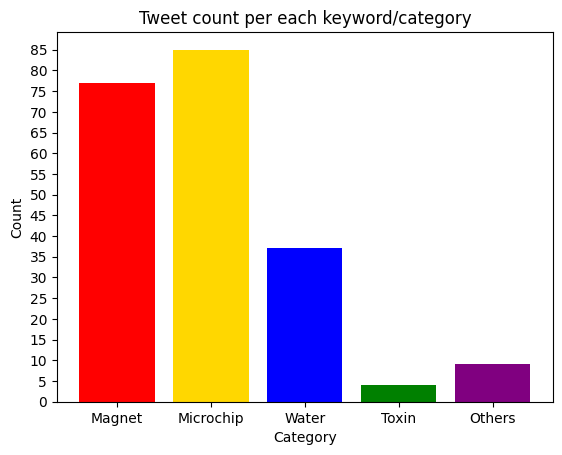

In [28]:
import matplotlib.pyplot as plt

# Set categories and count
categories = ['Magnet', 'Microchip', 'Water', 'Toxin', 'Others']
values = [magnet, microchip, water, toxin, others]
colors = ['red', 'gold', 'blue', 'green', 'purple']

# Create bar graph
plt.bar(categories, values, color=colors)

# Set title and axes names
plt.title('Tweet count per each keyword/category')
plt.xlabel('Category')
plt.ylabel('Count')

# Set y-axis in intervals of 5
plt.yticks(range(0, max(values) + 5, 5))

# Visualize graph
plt.show()